In [2]:
import numpy as np
import cv2
import os
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
img = cv2.imread(r"C:\project code\sports_personclassifier\sample_data\wp3090372-vladimir-putin-wallpapers.jpg")
img.shape

(1236, 2060, 3)

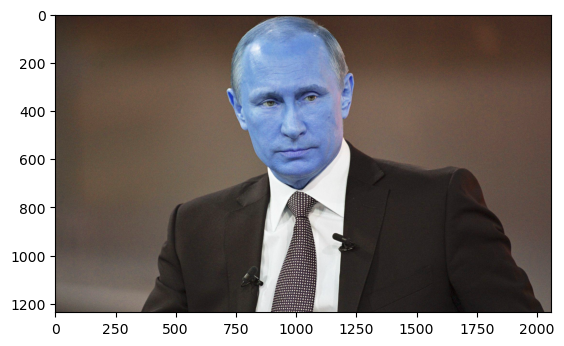

In [4]:
plt.imshow(img)
plt.axis("on")
plt.show()

In [5]:
gray =  cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1236, 2060)

In [9]:
gray

array([[ 37,  35,  35, ...,  37,  38,  39],
       [ 41,  38,  37, ...,  45,  47,  48],
       [ 43,  41,  38, ...,  38,  39,  40],
       ...,
       [ 64,  56,  71, ...,  99,  98,  98],
       [ 65,  56,  71, ..., 100, 100, 100],
       [ 65,  56,  70, ...,  96,  97,  99]], dtype=uint8)

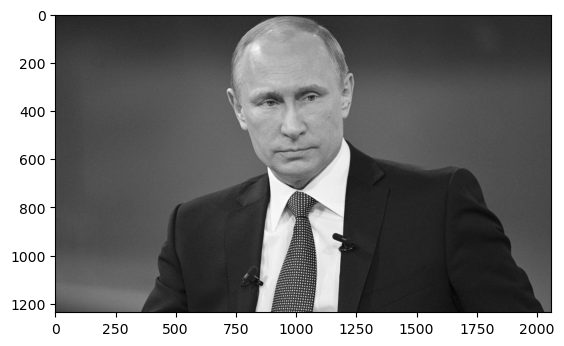

In [12]:
plt.imshow(gray,cmap='gray')
plt.show()

In [13]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[658, 105, 630, 630]])

In [15]:
(x,y,w,h) = faces[0]
x,y,w,h

(658, 105, 630, 630)

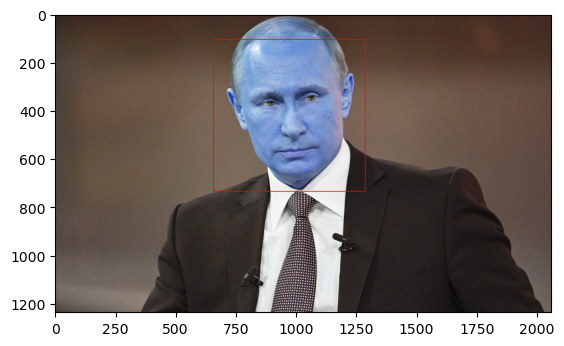

In [16]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)
plt.axis("on")
plt.show()

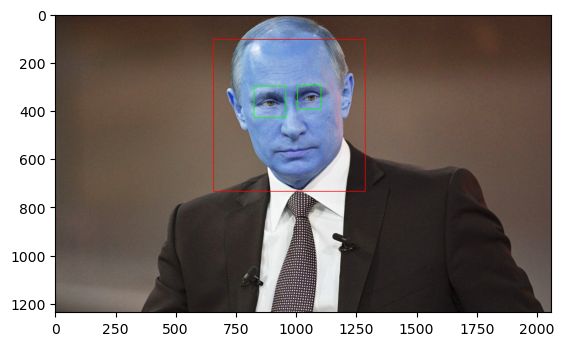

In [19]:
cv2.destroyAllWindows()
for (X,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color=face_img[y:y+h ,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5, minSize=(20, 20))

    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey) , (ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

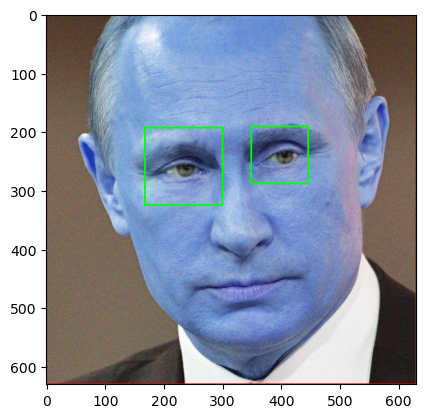

In [21]:
%matplotlib inline
plt.imshow(roi_color , cmap='gray')
plt.show()

In [22]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to read image: {image_path}")
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_color = img[y:y + h, x:x + w]
        
        
        return roi_color

    return None


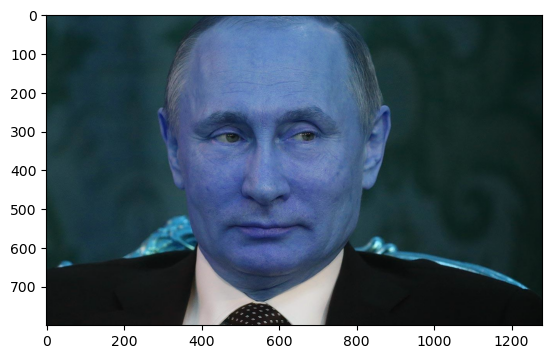

In [24]:
original_image = cv2.imread(r"C:\project code\sports_personclassifier\sample_data\wp3090474-vladimir-putin-wallpapers.jpg")
plt.imshow(original_image)
plt.show()

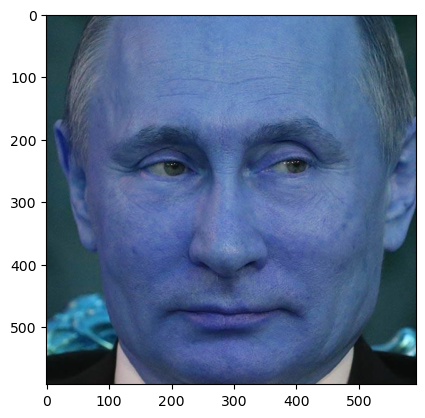

In [27]:
cropped_image = get_cropped_image_if_2_eyes(r"C:\project code\sports_personclassifier\sample_data\wp3090474-vladimir-putin-wallpapers.jpg")
plt.imshow(cropped_image)
plt.show()

                                            

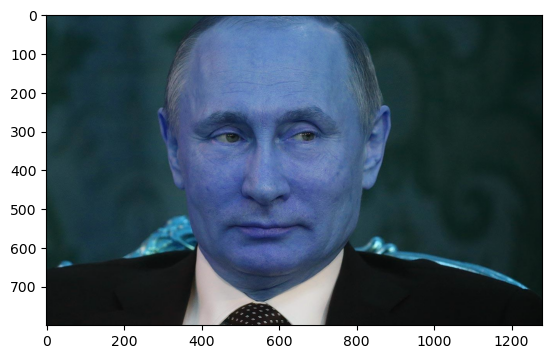

In [29]:
org_image_obstructed = cv2.imread(r"C:\project code\sports_personclassifier\sample_data\wp3090474-vladimir-putin-wallpapers.jpg")
plt.imshow(org_image_obstructed)
plt.show()

In [30]:
cropped_image = get_cropped_image_if_2_eyes(r"C:\project code\sports_personclassifier\sample_data\wp3090474-vladimir-putin-wallpapers.jpg")


In [31]:
path_to_data = r"C:\project code\sports_personclassifier\data_set"
path_to_cr_data = "./dataset/cropped/"

In [33]:

img_dirs = [
    r"C:\project code\sports_personclassifier\data_set\Georgia_ Meloni",
    r"C:\project code\sports_personclassifier\data_set\Benjamin_ Netnyahu",
    r"C:\project code\sports_personclassifier\data_set\Vlamidar_ Putin", 
    r"C:\project code\sports_personclassifier\data_set\Narendra_ Modi",
]

dataset_folder = r"C:\project code\sports_personclassifier\data_set"  


In [34]:
img_dirs

['C:\\project code\\sports_personclassifier\\data_set\\Georgia_ Meloni',
 'C:\\project code\\sports_personclassifier\\data_set\\Benjamin_ Netnyahu',
 'C:\\project code\\sports_personclassifier\\data_set\\Vlamidar_ Putin',
 'C:\\project code\\sports_personclassifier\\data_set\\Narendra_ Modi']

In [35]:
import os

path_to_data =r"C:\project code\sports_personclassifier\data_set"
path_to_cr_data = os.path.join(path_to_data, "cropped")


if not os.path.exists(path_to_cr_data):
    os.mkdir(path_to_cr_data)  
 

In [40]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [44]:
import os
import cv2  

cropped_image_dirs = []
president_file_names_dict = {}

cropped_base_dir = r"C:\project code\sports_personclassifier\data_set\cropped" 


for img_dir in img_dirs:
    count = 1
    president_name = os.path.basename(img_dir) 
    print(president_name)

    president_file_names_dict[president_name] = []

    
    cropped_folder = os.path.join(cropped_base_dir, president_name)

    
    if not os.path.exists(cropped_folder):
        os.makedirs(cropped_folder)
        cropped_image_dirs.append(cropped_folder)
        print("Generating cropped images in folder:", cropped_folder)

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)

    
        if roi_color is None:
            continue  

        cropped_file_name = f"{president_name}{count}.png"
        cropped_file_path = os.path.join(cropped_folder, cropped_file_name)

        cv2.imwrite(cropped_file_path, roi_color)  
        president_file_names_dict[president_name].append(cropped_file_path)

        count += 1


Georgia_ Meloni
Generating cropped images in folder: C:\project code\sports_personclassifier\data_set\cropped\Georgia_ Meloni
Benjamin_ Netnyahu
Generating cropped images in folder: C:\project code\sports_personclassifier\data_set\cropped\Benjamin_ Netnyahu
Vlamidar_ Putin
Generating cropped images in folder: C:\project code\sports_personclassifier\data_set\cropped\Vlamidar_ Putin
Failed to read image: C:\project code\sports_personclassifier\data_set\Vlamidar_ Putin\cropped
Narendra_ Modi
Generating cropped images in folder: C:\project code\sports_personclassifier\data_set\cropped\Narendra_ Modi


In [45]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar',level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /=255;
    coeffs=pywt.wavedec2(imArray,mode,level=level)

    coeffs_H=list(coeffs)
    coeffs_H[0] *=0;

    imArray_H=pywt.waverec2(coeffs_H,mode);
    imArray_H *=255;
    imArray_H = np.uint8(imArray_H)

    return imArray_H

    

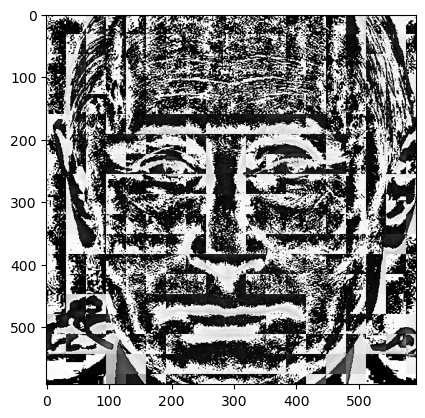

In [46]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')
plt.show()

In [47]:
president_file_names_dict


{'Georgia_ Meloni': ['C:\\project code\\sports_personclassifier\\data_set\\cropped\\Georgia_ Meloni\\Georgia_ Meloni1.png',
  'C:\\project code\\sports_personclassifier\\data_set\\cropped\\Georgia_ Meloni\\Georgia_ Meloni2.png',
  'C:\\project code\\sports_personclassifier\\data_set\\cropped\\Georgia_ Meloni\\Georgia_ Meloni3.png',
  'C:\\project code\\sports_personclassifier\\data_set\\cropped\\Georgia_ Meloni\\Georgia_ Meloni4.png',
  'C:\\project code\\sports_personclassifier\\data_set\\cropped\\Georgia_ Meloni\\Georgia_ Meloni5.png',
  'C:\\project code\\sports_personclassifier\\data_set\\cropped\\Georgia_ Meloni\\Georgia_ Meloni6.png',
  'C:\\project code\\sports_personclassifier\\data_set\\cropped\\Georgia_ Meloni\\Georgia_ Meloni7.png',
  'C:\\project code\\sports_personclassifier\\data_set\\cropped\\Georgia_ Meloni\\Georgia_ Meloni8.png',
  'C:\\project code\\sports_personclassifier\\data_set\\cropped\\Georgia_ Meloni\\Georgia_ Meloni9.png'],
 'Benjamin_ Netnyahu': ['C:\\projec

In [48]:
class_dict = {}
count = 0

for president_name in president_file_names_dict.keys():  
    class_dict[president_name] = count
    count += 1

print(class_dict)  
   

{'Georgia_ Meloni': 0, 'Benjamin_ Netnyahu': 1, 'Vlamidar_ Putin': 2, 'Narendra_ Modi': 3}


In [49]:
X = []
y = []

for president_name, training_files in president_file_names_dict.items():  
    for training_image in training_files:
        img = cv2.imread(training_image)

        if img is None:
            print(f"Warning: Could not read {training_image}")
            continue  

        scalled_raw_img = cv2.resize(img, (32, 32))

        
        img_har = w2d(img, 'db1', 5)

        if img_har is None:
            print(f"Warning: Wavelet transform failed for {training_image}")
            continue  

        scalled_img_har = cv2.resize(img_har, (32, 32))

        
        combined_img = np.vstack((
            scalled_raw_img.reshape(32 * 32 * 3, 1),  
            scalled_img_har.reshape(32 * 32, 1)  
        ))

        X.append(combined_img)
        y.append(class_dict[president_name])  

print("Data processing complete. Total images:", len(X))


Data processing complete. Total images: 67


In [50]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(67, 4096)

In [51]:
X[0]

array([175.,  60.,  19., ...,  27., 247., 234.])

In [52]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

pipe = Pipeline([('scaler',StandardScaler()), ('svc',SVC(kernel = 'rbf',C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


0.35294117647058826

In [54]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.08      1.00      0.15         1
           2       1.00      0.20      0.33        10
           3       1.00      0.60      0.75         5

    accuracy                           0.35        17
   macro avg       0.52      0.45      0.31        17
weighted avg       0.89      0.35      0.43        17



C:\Users\mahaj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mahaj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mahaj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [55]:

 import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification


if 'X' not in locals() or 'y' not in locals():
    X, y = make_classification(n_samples=100, n_features=5, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = np.array(X_train)
y_train = np.array(y_train)

# Ensure y_train is 1D
if len(y_train.shape) > 1:
    y_train = y_train.ravel()


model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [10, 50, 100],  # Correct reference to model step
            'randomforestclassifier__max_depth': [None, 10, 20]     # Correct reference to model step
        }
    },
    'svm': {
        'model': SVC(),
        'params': {
            'svc__C': [0.1, 1, 10],              # Correct reference to model step
            'svc__kernel': ['linear', 'rbf']     # Correct reference to model step
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {
            'logisticregression__C': [0.1, 1, 10],  # Correct reference to logistic regression step
            'logisticregression__solver': ['liblinear', 'lbfgs']  # Solvers for logistic regression
        }
    }
}

scores = []
best_estimators = {}

for algo, mp in model_params.items():
    
    pipe = make_pipeline(StandardScaler(), mp['model'])

    
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)

    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
print(df)  
  

                 model  best_score  \
0        random_forest    0.661818   
1                  svm    0.660000   
2  logistic_regression    0.736364   

                                         best_params  
0  {'randomforestclassifier__max_depth': 10, 'ran...  
1           {'svc__C': 0.1, 'svc__kernel': 'linear'}  
2  {'logisticregression__C': 0.1, 'logisticregres...  


In [56]:
best_estimators

{'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(max_depth=10))]),
 'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=0.1, kernel='linear'))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=0.1, solver='liblinear'))])}

In [57]:
best_estimators['svm'].score(X_test,y_test)

0.6428571428571429

In [58]:
best_estimators['random_forest'].score(X_test,y_test)

0.5

In [59]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7142857142857143

In [60]:
best_clf = best_estimators['svm']

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[2, 1, 0, 0],
       [0, 1, 3, 0],
       [0, 0, 4, 0],
       [0, 0, 1, 2]], dtype=int64)

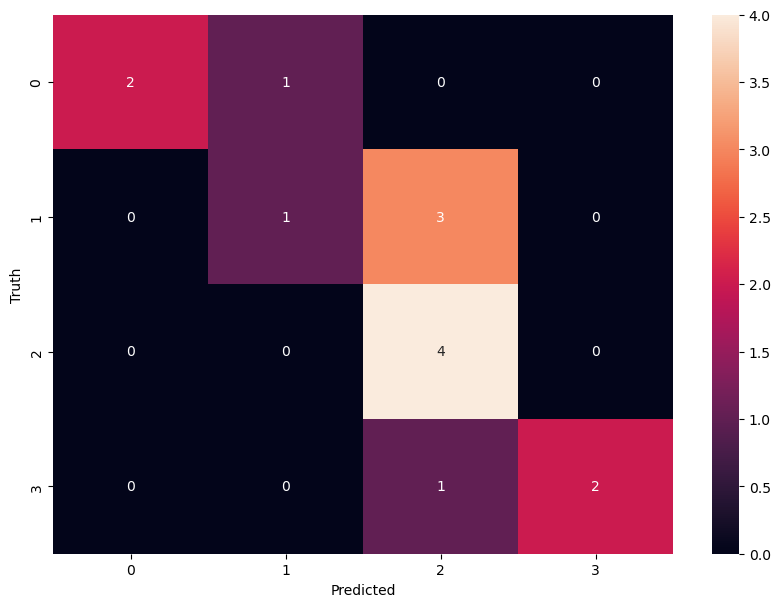

In [62]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [63]:
class_dict

{'Georgia_ Meloni': 0,
 'Benjamin_ Netnyahu': 1,
 'Vlamidar_ Putin': 2,
 'Narendra_ Modi': 3}

In [87]:
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']